In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.constants as scpc
%matplotlib inline
%precision 4

'%.4f'

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

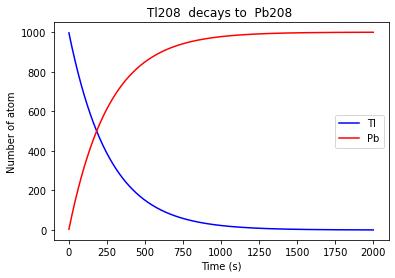

In [2]:
tau = 3.052*60 #seconds
N_Tl = 1000
N_Pb = 0
T=np.arange(1,2000,1)

def func1(t, tau=tau):
    return 1 - 2**((-t)/tau)

Tl_decay = [func1(i) for i in T]

Tl_curve = N_Tl - np.array(Tl_decay)*N_Tl
Pb_curve = np.array(Tl_decay)*1000     

plt.plot(T, Tl_curve, 'b', label = "Tl")
plt.plot(T, Pb_curve, 'r', label = "Pb")
plt.title("Tl208  decays to  Pb208 ")
plt.xlabel("Time (s)")
plt.ylabel("Number of atom")
plt.legend(loc = "best")
plt.show()

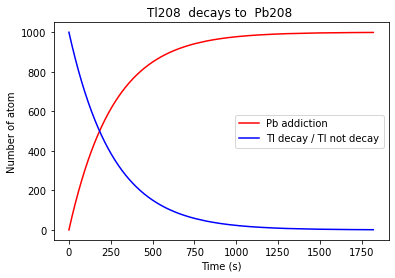

In [3]:
def func2(t, tau=tau):
    return (2**((-t)/tau))*(np.log(2)/tau)

time = np.linspace(0,len(T),10000) 
indices = [range(0,10000)]

p_nu = func2(time)
t_nu = np.random.choice(time, size=1000,replace=False,
                                p=(p_nu)/sum(p_nu))
t_nu = np.sort(t_nu)

plt.plot(t_nu, func1(t_nu)*1000, 'r', label = "Pb addiction")
plt.plot(t_nu, 1000-func1(t_nu)*1000, 'b', label = "Tl decay / Tl not decay")
plt.title("Tl208  decays to  Pb208 ")
plt.xlabel("Time (s)")
plt.ylabel("Number of atom")
plt.legend(loc = "best")
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [4]:
Z  = 79
E  = 7.7*1e6*scpc.e
N  = int(1e6)
a0 = scpc.physical_constants['Bohr radius'][0]
sigma= a0/100

x = np.random.normal(0, sigma, N)
y = np.random.normal(0, sigma, N)



theta = 2*np.arctan((Z*scpc.e**2)/(2*scpc.pi*E*scpc.epsilon_0)/ np.sqrt(x**2 +y**2 )) # deflection angle

bounce_back = len(theta[theta>np.pi/2])
fraction_bounce_back = bounce_back/N
print("Fraction of bounce back:", fraction_bounce_back*100,'%')

Fraction of bounce back: 0.1512 %


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

The integral (HIT/MESS) is equal to 1.444 and the error commited is: 0.006043700666942399
The integral (MEAN VALUE) is equal to 1.4485084573028764 and the error commited is: 0.005295973923682266


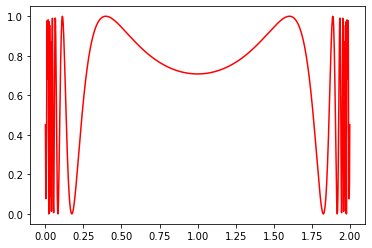

In [5]:
def f(x):
    return ((np.sin(1/(x*(2-x))))**2)


x=np.linspace(0.001,1.999,1000)
plt.plot(x,f(x),'r-')


N=10000

#------------HIT-MISS METHOD---------------

cnt=0
tot_area= 2 # the tot area of the box correspond to x*y and the integral is in [0,2] so x=2 and max y=f(x)=1
for i in range(N):
    x=2*np.random.random() #random in range [0,2]
    y=np.random.random()   #random in range [0,1]
    if y<f(x): 
        cnt+=1
I1=tot_area*cnt/N

error= 0.6745*np.sqrt(I1*(2-I1)/N)
error2=tot_area/(np.sqrt(N)) * np.std([f(x)])

print("The integral (HIT/MESS) is equal to {} and the error commited is: {}".format(I1,error ))

#------------MEAN VALUE METHOD ---------------
x=2*np.random.rand(N)
V=2 # b-a = 2-0
f_mean=1/N*np.sum(f(x) )
integral=f_mean*V
var_f= 0  #TO BE CHANGED
error=V/(np.sqrt(N)) * np.std([f(x)])
print("The integral (MEAN VALUE) is equal to {} and the error commited is: {}".format(integral, error ))

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [6]:
n=1000000

#----2D sphere -----
def c(x,y):
    if (x**2 + y**2) <1 or (x**2 + y**2) ==1 :
        return (1)
    else:
        return(0)

    
x= -1 + 2*np.random.random(n) #random in range [-1,1]
y= -1 + 2*np.random.random(n) #random in range [-1,1]

V=4 # [1-(-1)]*[1-(-1)] = 2*2

circle = (V/n) * np.sum( [c(x[i],y[i]) for i in range(n)] )
print (circle)

3.142668


In [7]:
#-----------FOR A GENERIC DIMENSION D ----------------
N=100000
%precision 4

def circle_area(dimension, N):
        
    def c_n(data):
        tmp=0
        for j in range(len(data)):
            tmp+=data[j]**2
        if np.sqrt(tmp)<1 or np.sqrt(tmp)==1:
             return (1)
        else:
             return(0)
            #------------------------

    x= -1 + 2*np.random.rand(N,dimension) #random in range [-1,1]
    V=2**dimension

    surface=(V/N)*np.sum( [c_n(x[i]) for i in range(N)] )
    print ('\nThe (hyper)surface of a sphere in {}-D is: {}'.format(dimension, surface))


for d in range(1,11):
    circle_area(d,N)



The (hyper)surface of a sphere in 1-D is: 2.0

The (hyper)surface of a sphere in 2-D is: 3.14752

The (hyper)surface of a sphere in 3-D is: 4.19632

The (hyper)surface of a sphere in 4-D is: 4.964160000000001

The (hyper)surface of a sphere in 5-D is: 5.267200000000001

The (hyper)surface of a sphere in 6-D is: 5.17696

The (hyper)surface of a sphere in 7-D is: 4.7488

The (hyper)surface of a sphere in 8-D is: 4.15744

The (hyper)surface of a sphere in 9-D is: 3.1948800000000004

The (hyper)surface of a sphere in 10-D is: 2.6828800000000004


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [8]:
N=100000

def f(x):
    return (x**(-0.5) / (np.exp(x) + 1) )
def w(x):
    return 1/np.sqrt(x)

x=np.square(np.random.uniform(0,2,N))/4

y=np.random.random(N)
V=1-0 # b-a
weight_integral=1/N*np.sum([w(y)])*V #w(x) in [0,1] i equal to 2
print('The value approximated of the integral in [0,1] of w(x) is {} while the correct one is 2'.format(weight_integral) )
integral=(1/N)*np.sum( f(x)/w(x) )*weight_integral
print('\nInstead, the value of the integral (I) is {}'.format(integral) )

The value approximated of the integral in [0,1] of w(x) is 2.000959181612294 while the correct one is 2

Instead, the value of the integral (I) is 0.8392562836091597
